In [ ]:
# prompt: install and load all necessary library for descriptive and inferential statistics and visualization

install.packages("ggplot2")
install.packages("dplyr")
install.packages("readr")
install.packages("tidyr")
install.packages("caret")


library(ggplot2)
library(dplyr)
library(readr)
library(tidyr)
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘future.apply’, ‘lava’, ‘prodlim’, ‘ipred’, ‘recipes’, ‘reshape2’


Loading required package: lattice



In [ ]:
# prompt: read /content/sample_data/data_analysis_cog_sc.csv to dataframe

df <- readr::read_csv('/content/sample_data/data_analysis_cog_sc.csv')

Rows: 81 Columns: 30
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (30): Duration (in seconds), Q1, b4_sky, b4_sky_1, b4_sky_2, b4_cold, b4...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
# prompt: column names

colnames(df)

[1] "Duration (in seconds)" "Q1"                    "b4_sky"               
 [4] "b4_sky_1"              "b4_sky_2"              "b4_cold"              
 [7] "b4_cold_1"             "b4_cold_2"             "b4_metal"             
[10] "b4_metal_1"            "b4_metal_2"            "b4_float"             
[13] "b4_float_1"            "b4_float_2"            "b4_lighning"          
[16] "b4_lighning_1"         "b4_lighning_2"         "aft_sky"              
[19] "aft_sky_1"             "aft_cold"              "aft_cold_1"           
[22] "aft_metal"             "aft_metal_1"           "aft_float"            
[25] "aft_float_1"           "aft_lightning"         "aft_lightning_1"      
[28] "country"               "age"                   "gender"

In [ ]:
# prompt: change lighning'  in the colnames to lightning

library(stringr)
colnames(df) <- str_replace_all(colnames(df), "lighning", "lightning")


In [ ]:
colnames(df)

[1] "Duration (in seconds)" "Q1"                    "b4_sky"               
 [4] "b4_sky_1"              "b4_sky_2"              "b4_cold"              
 [7] "b4_cold_1"             "b4_cold_2"             "b4_metal"             
[10] "b4_metal_1"            "b4_metal_2"            "b4_float"             
[13] "b4_float_1"            "b4_float_2"            "b4_lightning"         
[16] "b4_lightning_1"        "b4_lightning_2"        "aft_sky"              
[19] "aft_sky_1"             "aft_cold"              "aft_cold_1"           
[22] "aft_metal"             "aft_metal_1"           "aft_float"            
[25] "aft_float_1"           "aft_lightning"         "aft_lightning_1"      
[28] "country"               "age"                   "gender"

In [ ]:

df <- df |>
  dplyr::mutate(
    sky_dif = b4_sky - aft_sky,
    cold_dif = b4_cold - aft_cold,
    metal_dif = b4_metal - aft_metal,
    float_dif = b4_float - aft_float,
    lightning_dif = b4_lightning - aft_lightning
  )



In [ ]:
df<-df|>
  mutate(
  b4_sky_s = case_when(
      b4_sky == 1 ~ 2,
      b4_sky == 2 ~ 1

  ),
  aft_sky_s = case_when(
      aft_sky == 1 ~ 2,
      aft_sky == 2 ~ 1
    ),
    b4_cold_s = case_when(
      b4_cold == 1 ~ 2,
      b4_cold == 2 ~ 1
    ),
    aft_cold_s = case_when(
      aft_cold == 1 ~ 2,
      aft_cold == 2 ~ 1
    ),
    b4_metal_s = case_when(
      b4_metal == 1 ~ 1,
      b4_metal == 2 ~ 2
    ),
    aft_metal_s = case_when(
      aft_metal == 1 ~ 1,
      aft_metal == 2 ~ 2
    ),
    b4_float_s = case_when(
      b4_float == 1 ~ 1,
      b4_float == 2 ~ 2
    ),
    aft_float_s = case_when(
      aft_float == 1 ~ 1,
      aft_float == 2 ~ 2
    ),
    b4_lightning_s = case_when(
      b4_lightning == 1 ~ 2,
      b4_lightning == 2 ~ 1
    ),
    aft_lightning_s = case_when(
      aft_lightning == 1 ~ 2,
      aft_lightning == 2 ~ 1
    ),
  )

In [ ]:
df <- df |>
  dplyr::mutate(
    sky_s_dif = b4_sky_s - aft_sky_s,
    cold_s_dif = b4_cold_s - aft_cold_s,
    metal_s_dif = b4_metal_s - aft_metal_s,
    float_s_dif = b4_float_s - aft_float_s,
    lightning_s_dif = b4_lightning_s - aft_lightning_s
  )



In [ ]:
df <- df |>
  dplyr::mutate(
    sky_certainty = b4_sky_2 - aft_sky_1,
    cold_certainty = b4_cold_2 - aft_cold_1,
    metal_certainty= b4_metal_2 - aft_metal_1,
    float_certainty = b4_float_2 - aft_float_1,
    lightning_certainty = b4_lightning_2 - aft_lightning_1
  )



In [ ]:
df_certainty<-df |>
  dplyr::select(ends_with('certainty'))

In [ ]:
# prompt: show only diffs column

df_diff<-df |>
  dplyr::select(ends_with('dif'))

In [ ]:
colnames(df_diff)

[1] "sky_dif"         "cold_dif"        "metal_dif"       "float_dif"      
 [5] "lightning_dif"   "sky_s_dif"       "cold_s_dif"      "metal_s_dif"    
 [9] "float_s_dif"     "lightning_s_dif"

In [ ]:
# Select multiple columns using a character vector
df_correctness_change <- df[c('sky_dif','cold_dif','metal_dif','float_dif','lightning_dif')]

In [ ]:
df_source_change<-df[c('sky_s_dif','cold_s_dif','metal_s_dif','float_s_dif','lightning_s_dif')]

In [ ]:
df$familiarity_average<-rowMeans(df[c('b4_sky_1','b4_cold_1','b4_metal_1','b4_float_1','b4_lightning_1')])

In [ ]:
df_analysis<-df[c('correct_average','source_change_average','certainty_average','prereveal_certainty','reveal_certainty','familiarity_average')]

In [ ]:
# prompt: add a column than contains average to df_change

df_correctness_change$average <- rowMeans(df_correctness_change)

In [ ]:
df$correct_average <- df_correctness_change$average

In [ ]:
# prompt: add a column than contains average to df_change

df_source_change$average <- rowMeans(df_source_change)

In [ ]:
df$source_change_average<-df_source_change$average

In [ ]:
df$certainty_average <- rowMeans(df_certainty)

In [ ]:


df <- df |>
  dplyr::mutate(
    prereveal_certainty = rowMeans(dplyr::select(df, b4_sky_2, b4_cold_2, b4_metal_2, b4_float_2, b4_lightning_2), na.rm = TRUE),
    reveal_certainty = rowMeans(dplyr::select(df, aft_sky_1, aft_cold_1, aft_metal_1, aft_float_1, aft_lightning_1), na.rm = TRUE)
  )

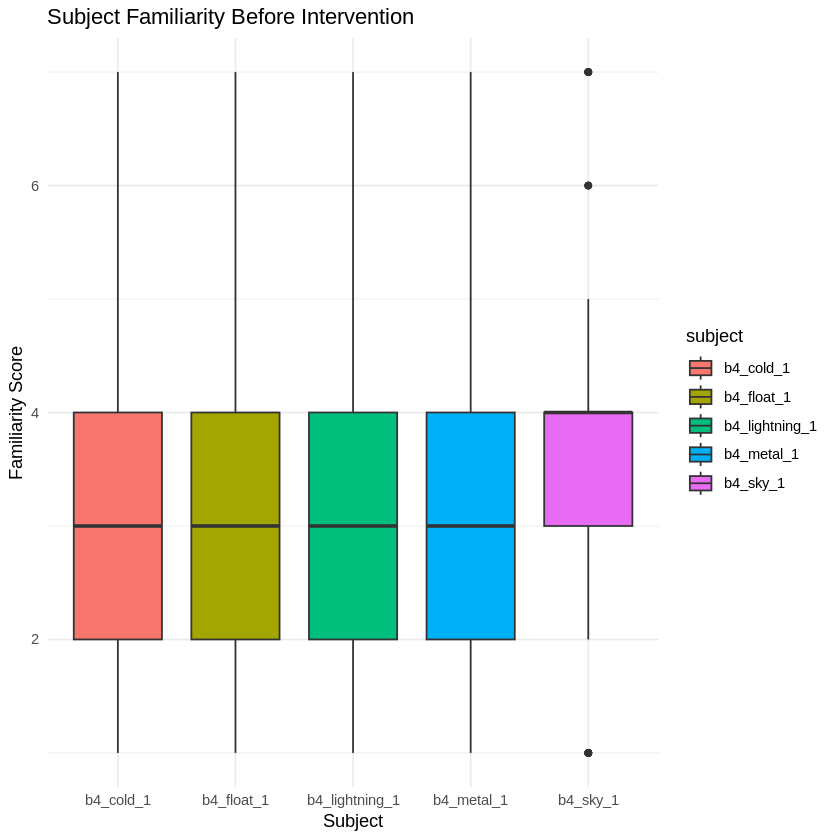

In [ ]:
# prompt: # prompt: subject familiarity box plot with df$b4_sky_1,b4_metal_1...
# # Assuming the relevant columns for subject familiarity are b4_sky_1, b4_metal_1, etc.
# # and that they represent a numerical score.
# # If the column names are different, please adjust accordingly.
# # Reshape the data to long format for plotting, make colorful

df_long <- df |>
  tidyr::pivot_longer(
    cols = c(b4_sky_1, b4_metal_1,b4_float_1,b4_cold_1,b4_lightning_1),  # Add other relevant columns here
    names_to = "subject",
    values_to = "familiarity_score"
  )

ggplot(df_long, aes(x = subject, y = familiarity_score, fill = subject)) +
  geom_boxplot() +
  labs(title = "Subject Familiarity Before Intervention",
       x = "Subject",
       y = "Familiarity Score") +
  theme_minimal()

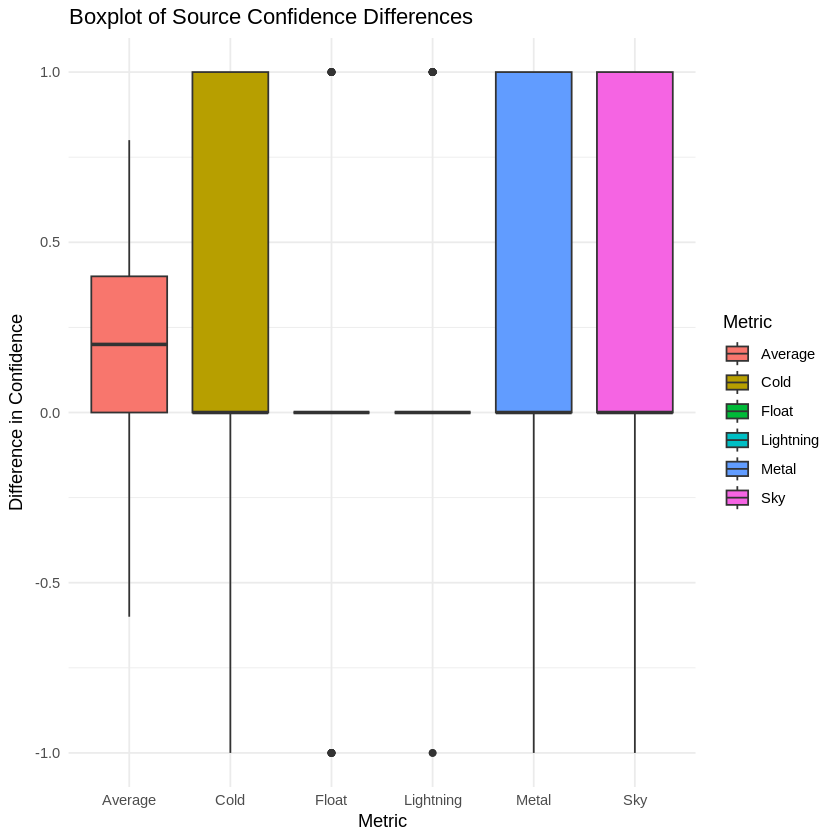

In [ ]:
# prompt: boxplot for df[c('sky_s_dif','cold_s_dif','metal_s_dif','float_s_dif','lightning_s_dif'.'average')],

# Fix column names for plotting
colnames(df_source_change) <- c('Sky','Cold','Metal','Float','Lightning','Average')

# Reshape data for plotting
df_source_long <- tidyr::pivot_longer(df_source_change, cols = everything(), names_to = "Metric", values_to = "Value")

# Create boxplot
ggplot(df_source_long, aes(x = Metric, y = Value, fill = Metric)) +
  geom_boxplot() +
  labs(title = "Boxplot of Source Confidence Differences",
       x = "Metric",
       y = "Difference in Confidence") +
  theme_minimal()

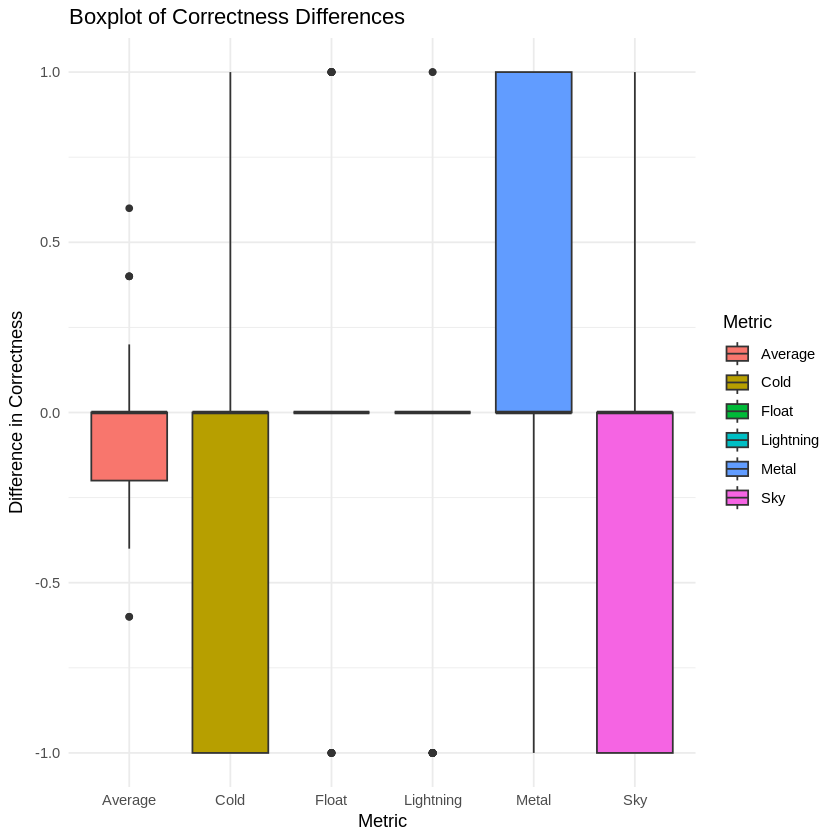

In [ ]:
# prompt: boxplot for df[c('sky_dif','cold_dif','metal_dif','float_dif','lightning_dif'.'average')],

# Rename columns for plotting
colnames(df_correctness_change) <- c('Sky','Cold','Metal','Float','Lightning','Average')

# Reshape data for plotting
df_correctness_long <- tidyr::pivot_longer(df_correctness_change, cols = everything(), names_to = "Metric", values_to = "Value")

# Create boxplot
ggplot(df_correctness_long, aes(x = Metric, y = Value, fill = Metric)) +
  geom_boxplot() +
  labs(title = "Boxplot of Correctness Differences",
       x = "Metric",
       y = "Difference in Correctness") +
  theme_minimal()

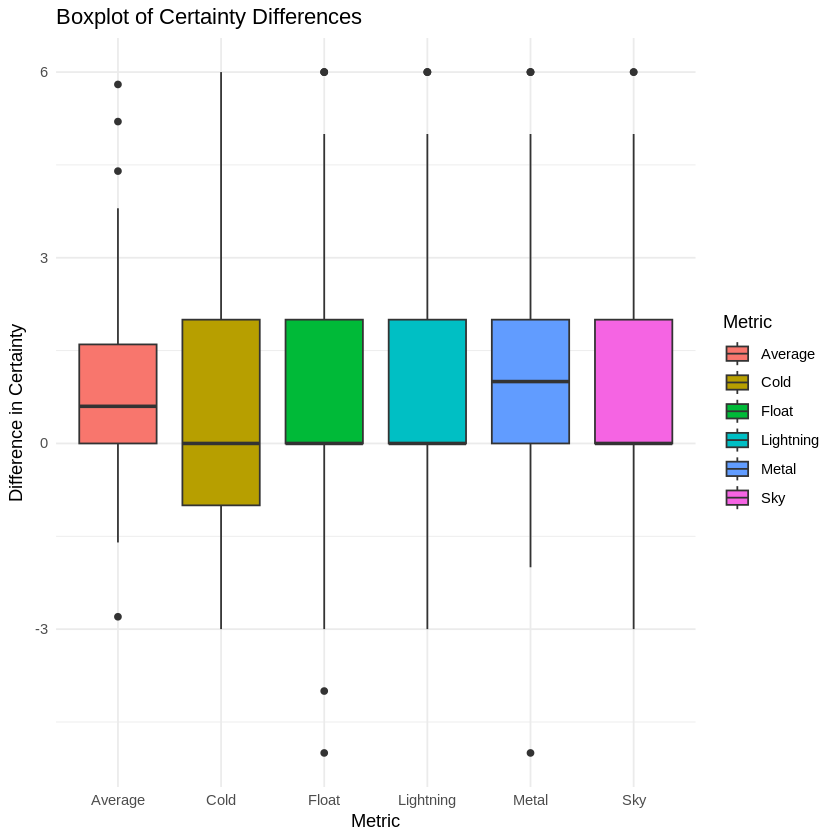

In [ ]:
# prompt: boxplot for df_certainty[c('sky_certainty','cold_certainty','metal_certainty','float_certainty','lightning_certainty'.'average')],

df_certainty$average <- rowMeans(df_certainty)

# Rename columns for plotting
colnames(df_certainty) <- c('Sky','Cold','Metal','Float','Lightning','Average')

# Reshape data for plotting
df_certainty_long <- tidyr::pivot_longer(df_certainty, cols = everything(), names_to = "Metric", values_to = "Value")

# Create boxplot
ggplot(df_certainty_long, aes(x = Metric, y = Value, fill = Metric)) +
  geom_boxplot() +
  labs(title = "Boxplot of Certainty Differences",
       x = "Metric",
       y = "Difference in Certainty") +
  theme_minimal()

In [ ]:
# prompt: df column names

colnames(df)

[1] "Duration (in seconds)" "Q1"                    "b4_sky"               
 [4] "b4_sky_1"              "b4_sky_2"              "b4_cold"              
 [7] "b4_cold_1"             "b4_cold_2"             "b4_metal"             
[10] "b4_metal_1"            "b4_metal_2"            "b4_float"             
[13] "b4_float_1"            "b4_float_2"            "b4_lightning"         
[16] "b4_lightning_1"        "b4_lightning_2"        "aft_sky"              
[19] "aft_sky_1"             "aft_cold"              "aft_cold_1"           
[22] "aft_metal"             "aft_metal_1"           "aft_float"            
[25] "aft_float_1"           "aft_lightning"         "aft_lightning_1"      
[28] "country"               "age"                   "gender"               
[31] "sky_dif"               "cold_dif"              "metal_dif"            
[34] "float_dif"             "lightning_dif"         "b4_sky_s"             
[37] "aft_sky_s"             "b4_cold_s"             "aft_cold_s"           
[40] "b4_metal_s"            "aft_metal_s"           "b4_float_s"           
[43] "aft_float_s"           "b4_lightning_s"        "aft_lightning_s"      
[46] "sky_s_dif"             "cold_s_dif"            "metal_s_dif"          
[49] "float_s_dif"           "lightning_s_dif"       "sky_certainty"        
[52] "cold_certainty"        "metal_certainty"       "float_certainty"      
[55] "lightning_certainty"   "familiarity_average"   "correct_average"      
[58] "source_change_average" "certainty_average"     "prereveal_certainty"  
[61] "reveal_certainty"

In [ ]:
# prompt: extrat all colums whose names contain sky into df_sky

df_sky <- df |>
  dplyr::select(contains('sky'))

df_float <- df |>
  dplyr::select(contains('float'))

df_cold <- df |>
  dplyr::select(contains('cold'))

df_metal <- df |>
  dplyr::select(contains('metal'))

df_lightning <- df |>
  dplyr::select(contains('lightning'))

In [ ]:
# prompt: normalize then covariance matrix df_analysis

df_analysis_normalized <- scale(df_analysis)
cov_matrix <- cov(df_analysis_normalized)
cov_matrix

,correct_average,source_change_average,certainty_average,prereveal_certainty,reveal_certainty,familiarity_average
correct_average,1.00000000,-0.33961961,-0.08468395,-0.03723613,0.04782129,-0.06903769
source_change_average,-0.33961961,1.00000000,0.09017949,0.05888338,-0.03105008,0.15199112
certainty_average,-0.08468395,0.09017949,1.00000000,0.52537380,-0.47616867,0.05130456
prereveal_certainty,-0.03723613,0.05888338,0.52537380,1.00000000,0.49805072,0.62289678
reveal_certainty,0.04782129,-0.03105008,-0.47616867,0.49805072,1.00000000,0.59146192
familiarity_average,-0.06903769,0.15199112,0.05130456,0.62289678,0.59146192,1.00000000


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


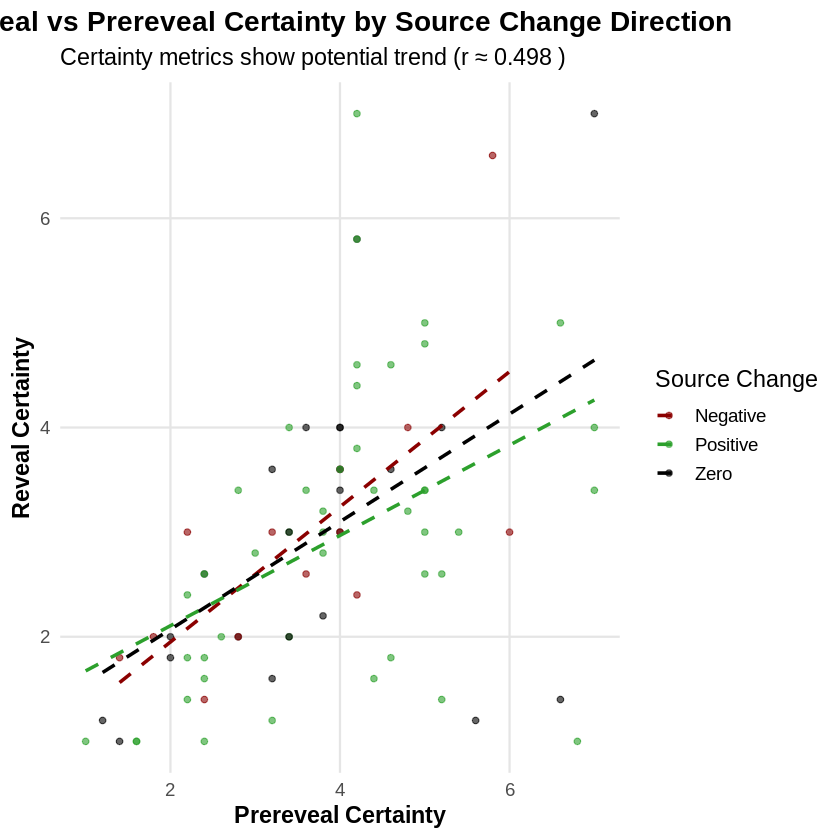

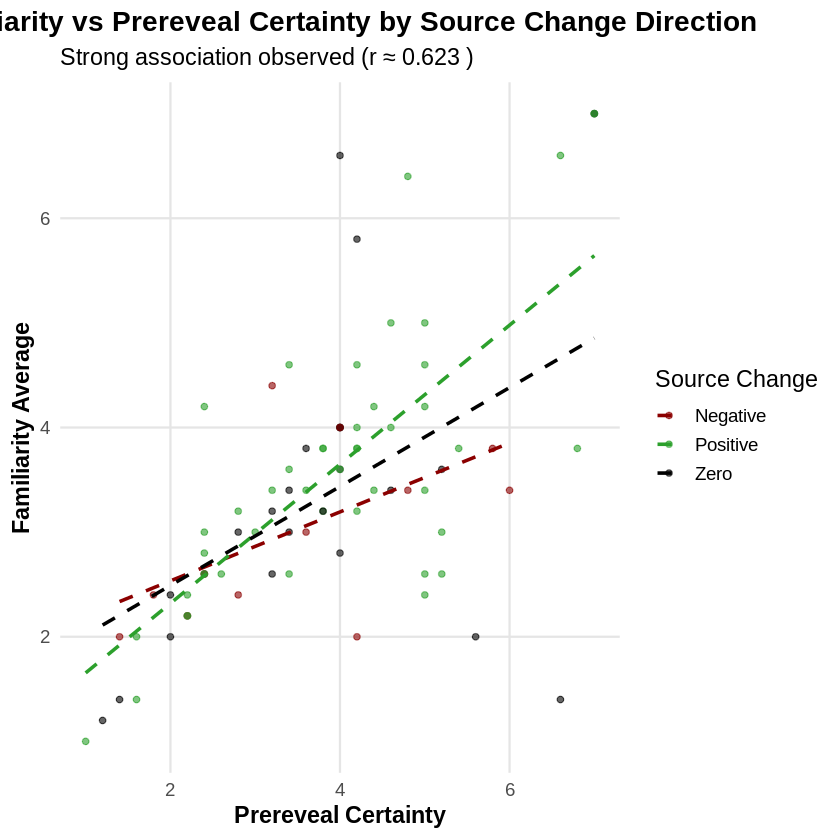

In [ ]:
library(ggplot2)
library(dplyr)

# Create color label for each point
df <- df %>%
  mutate(change_color = case_when(
    source_change_average > 0 ~ "Positive",
    source_change_average < 0 ~ "Negative",
    source_change_average == 0 ~ "Zero",
    TRUE ~ NA_character_
  ))

# Define custom theme
custom_theme <- theme_minimal(base_size = 14) +
  theme(
    plot.title = element_text(face = "bold", hjust = 0.5),
    axis.title = element_text(face = "bold"),
    panel.grid.major = element_line(color = "gray90"),
    panel.grid.minor = element_blank()
  )

# Custom color map
custom_colors <- c(
  "Positive" = "#2ca02c",  # green
  "Negative" = "darkred",  # red
  "Zero" = "black"         # black
)

# 1. Reveal Certainty vs Prereveal Certainty
ggplot(df, aes(x = prereveal_certainty, y = reveal_certainty)) +
  geom_point(aes(color = change_color), alpha = 0.6) +
  geom_smooth(aes(color = change_color), method = "lm", se = FALSE, linetype = "dashed") +
  scale_color_manual(values = custom_colors) +
  labs(
    title = "Reveal vs Prereveal Certainty by Source Change Direction",
    subtitle = paste("Certainty metrics show potential trend (r ≈",
                     round(cor(df$prereveal_certainty, df$reveal_certainty, use = "pairwise.complete.obs"), 3), ")"),
    x = "Prereveal Certainty",
    y = "Reveal Certainty",
    color = "Source Change"
  ) +
  custom_theme

# 2. Familiarity Average vs Prereveal Certainty
ggplot(df, aes(x = prereveal_certainty, y = familiarity_average)) +
  geom_point(aes(color = change_color), alpha = 0.6) +
  geom_smooth(aes(color = change_color), method = "lm", se = FALSE, linetype = "dashed") +
  scale_color_manual(values = custom_colors) +
  labs(
    title = "Familiarity vs Prereveal Certainty by Source Change Direction",
    subtitle = paste("Strong association observed (r ≈",
                     round(cor(df$prereveal_certainty, df$familiarity_average, use = "pairwise.complete.obs"), 3), ")"),
    x = "Prereveal Certainty",
    y = "Familiarity Average",
    color = "Source Change"
  ) +
  custom_theme


In [ ]:
# prompt: include mean and standard deviation , # prompt: paired t test prereveal and reveal
# t.test(df$prereveal_certainty, df$reveal_certainty, paired = TRUE)

summary_stats <- df |>
  dplyr::select(prereveal_certainty, reveal_certainty) |>
  dplyr::summarise(
    mean_prereveal = mean(prereveal_certainty, na.rm = TRUE),
    sd_prereveal = sd(prereveal_certainty, na.rm = TRUE),
    mean_reveal = mean(reveal_certainty, na.rm = TRUE),
    sd_reveal = sd(reveal_certainty, na.rm = TRUE)
  )

print("Summary Statistics:")
print(summary_stats)

t.test(df$prereveal_certainty, df$reveal_certainty, paired = TRUE)

[1] "Summary Statistics:"
# A tibble: 1 × 4
  mean_prereveal sd_prereveal mean_reveal sd_reveal
           <dbl>        <dbl>       <dbl>     <dbl>
1           3.83         1.44        2.95      1.40



	Paired t-test

data:  df$prereveal_certainty and df$reveal_certainty
t = 5.533, df = 80, p-value = 3.857e-07
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
 0.5596938 1.1884544
sample estimates:
mean difference 
      0.8740741 


In [ ]:
# Calculate row means of the three certainty variables
certainty_average <- rowMeans(df[ c("b4_sky_1", "b4_metal_1", "b4_cold_1")], na.rm = TRUE)

# Create logical indices for the two groups
group_pos <- df$source_change_average > 0
group_neg <- df$source_change_average < 0

# Calculate mean and SD for each group
mean_pos <- mean(certainty_average[group_pos], na.rm = TRUE)
sd_pos <- sd(certainty_average[group_pos], na.rm = TRUE)

mean_neg <- mean(certainty_average[group_neg], na.rm = TRUE)
sd_neg <- sd(certainty_average[group_neg], na.rm = TRUE)

# Print results
cat("Group (source_change_average > 0):\n")
cat("  Mean:", mean_pos, "\n")
cat("  SD:", sd_pos, "\n\n")

cat("Group (source_change_average < 0):\n")
cat("  Mean:", mean_neg, "\n")
cat("  SD:", sd_neg, "\n\n")

# Perform Welch two-sample t-test
t.test(
  certainty_average[group_pos],
  certainty_average[group_neg]
)

Group (source_change_average > 0):
  Mean: 3.718519 
  SD: 1.405177 

Group (source_change_average < 0):
  Mean: 2.871795 
  SD: 0.9957173 




	Welch Two Sample t-test

data:  certainty_average[group_pos] and certainty_average[group_neg]
t = 2.4428, df = 27.314, p-value = 0.02131
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.1359054 1.5575419
sample estimates:
mean of x mean of y 
 3.718519  2.871795 


In [ ]:
df_analysis

correct_average,source_change_average,certainty_average,prereveal_certainty,reveal_certainty,familiarity_average
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-0.6,0.2,0.2,5.0,4.8,4.6
-0.2,0.2,2.6,5.2,2.6,3.0
0.2,0.2,2.0,3.2,1.2,3.4
0.0,0.0,1.2,5.2,4.0,3.6
0.4,0.4,-2.8,4.2,7.0,3.2
0.2,0.2,-0.4,4.2,4.6,4.0
0.0,0.0,4.4,5.6,1.2,2.0
-0.2,0.2,1.4,3.4,2.0,4.6
-0.2,0.2,2.4,5.0,2.6,2.6


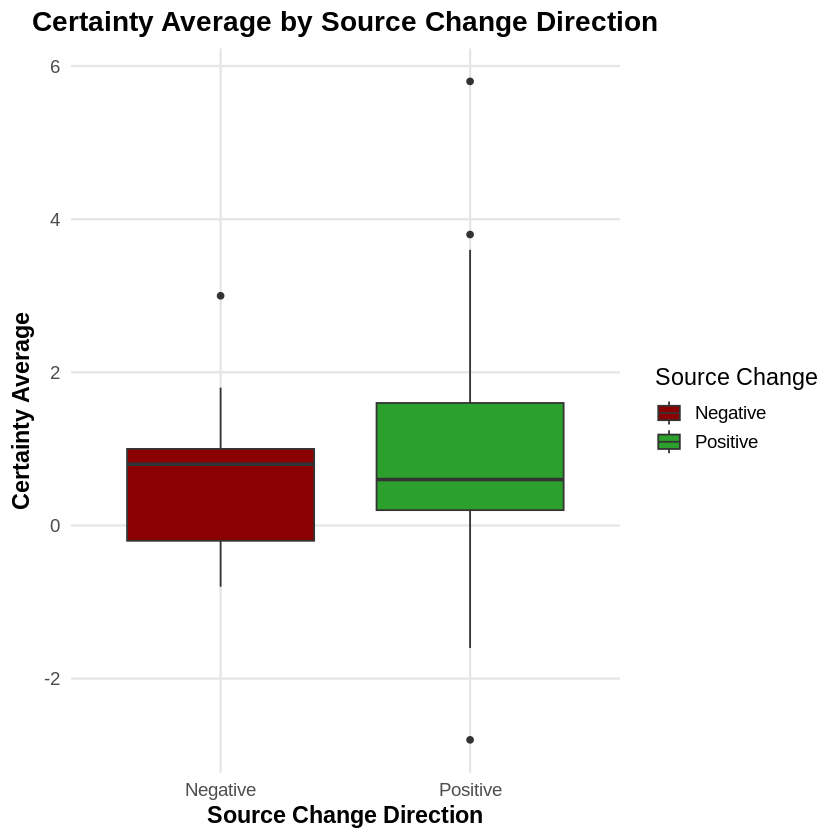

In [ ]:
# prompt: box plot  reaveal certainty for those with positive and negative certainty average

# Reshape the data for plotting
df_certainty_boxplot <- df |>
  dplyr::select(certainty_average, change_color) |>
  dplyr::filter(!is.na(certainty_average) & !is.na(change_color) & change_color %in% c("Positive", "Negative"))

# Create the boxplot
ggplot(df_certainty_boxplot, aes(x = change_color, y = certainty_average, fill = change_color)) +
  geom_boxplot() +
  scale_fill_manual(values = custom_colors) +
  labs(
    title = "Certainty Average by Source Change Direction",
    x = "Source Change Direction",
    y = "Certainty Average",
    fill = "Source Change"
  ) +
  custom_theme